In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("../data/customer_booking.csv", encoding="latin-1")
df.head()


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


# Exploratory Data Analysis(EDA)

In [3]:
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  str    
 2   trip_type              50000 non-null  str    
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  str    
 7   route                  50000 non-null  str    
 8   booking_origin         50000 non-null  str    
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), str(5)
memory usage: 5.3 MB


In [4]:
df.describe()


,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [5]:
df.isnull().sum()


num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [6]:
df["booking_complete"].value_counts()


booking_complete
0    42522
1     7478
Name: count, dtype: int64

In [7]:
#Average number of passengers
df.groupby("booking_complete")["num_passengers"].mean()

booking_complete
0    1.580923
1    1.649906
Name: num_passengers, dtype: float64

In [8]:
#Average purchase lead time
df.groupby("booking_complete")["purchase_lead"].mean()

booking_complete
0    85.779926
1    80.167157
Name: purchase_lead, dtype: float64

In [9]:
#Average length of stay
df.groupby("booking_complete")["length_of_stay"].mean()

booking_complete
0    23.647218
1    19.617679
Name: length_of_stay, dtype: float64

In [10]:
#Booking rate by day of flight
df.groupby("flight_day")["booking_complete"].mean()

flight_day
Fri    0.145393
Mon    0.148605
Sat    0.148142
Sun    0.141440
Thu    0.151131
Tue    0.147139
Wed    0.163148
Name: booking_complete, dtype: float64

# Data Visualisations

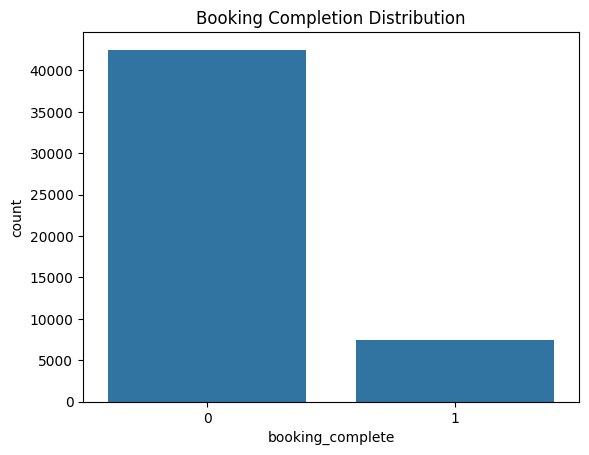

In [11]:
plt.figure()
sns.countplot(x="booking_complete", data=df)
plt.title("Booking Completion Distribution")
plt.show()


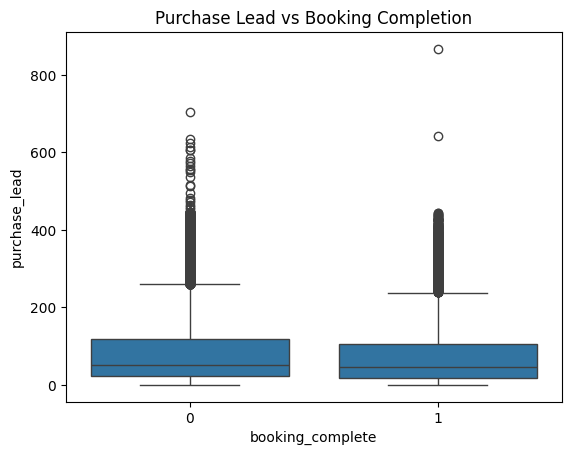

In [12]:
plt.figure()
sns.boxplot(x="booking_complete", y="purchase_lead", data=df)
plt.title("Purchase Lead vs Booking Completion")
plt.show()


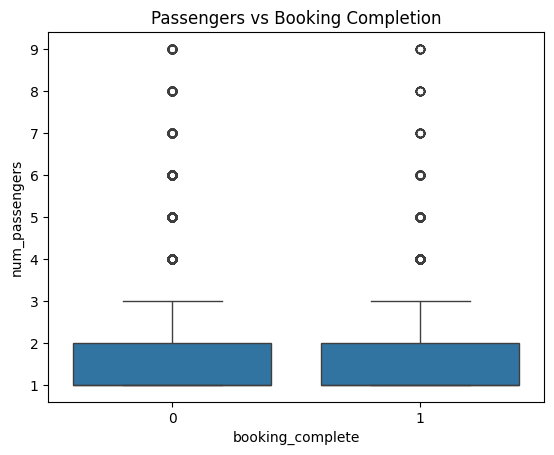

In [13]:
plt.figure()
sns.boxplot(x="booking_complete", y="num_passengers", data=df)
plt.title("Passengers vs Booking Completion")
plt.show()


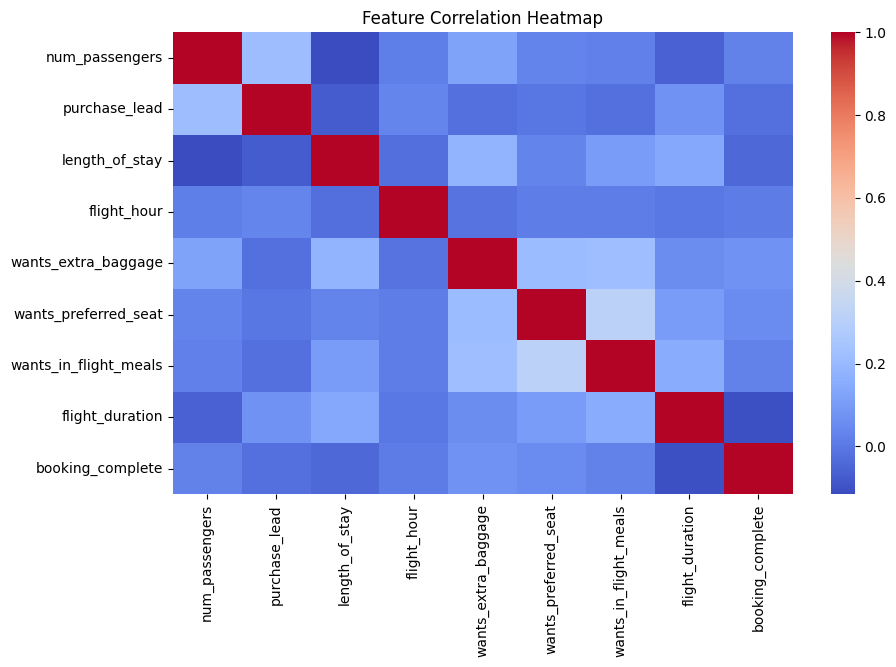

In [14]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()


# Feature engineering.

In [15]:
df["total_extras"] = (
    df["wants_extra_baggage"] +
    df["wants_preferred_seat"] +
    df["wants_in_flight_meals"]
)

df[[
    "wants_extra_baggage",
    "wants_preferred_seat",
    "wants_in_flight_meals",
    "total_extras"
]].head()


,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,total_extras
0,1,0,0,1
1,0,0,0,0
2,1,1,0,2
3,0,0,1,1
4,1,0,1,2


# Categorical Encoding(text to values)

In [16]:
day_mapping = {
    "Mon": 1, "Tue": 2, "Wed": 3,
    "Thu": 4, "Fri": 5, "Sat": 6, "Sun": 7
}

df["flight_day"] = df["flight_day"].map(day_mapping)

df["flight_day"].head()


0    6
1    6
2    3
3    6
4    3
Name: flight_day, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

categorical_cols = ["sales_channel", "trip_type", "route", "booking_origin"]

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.head()


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,total_extras
0,2,0,2,262,19,7,6,0,61,1,0,0,5.52,0,1
1,1,0,2,112,20,3,6,0,61,0,0,0,5.52,0,0
2,2,0,2,243,22,17,3,0,36,1,1,0,5.52,0,2
3,1,0,2,96,31,4,6,0,61,0,0,1,5.52,0,1
4,2,0,2,68,22,15,3,0,36,1,0,1,5.52,0,2


# Splitting the data

In [18]:
X = df.drop("booking_complete", axis=1)
y = df["booking_complete"]

print("Feature shape:", X.shape)
print("Target shape:", y.shape)


Feature shape: (50000, 14)
Target shape: (50000,)


# Training(80%) , Testing(20%)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set:", X_train.shape)
print("Test set:", X_test.shape)


Training set: (40000, 14)
Test set: (10000, 14)


# Model Training

# 1) Logistic Regression 

In [20]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(
    max_iter=5000,
    class_weight="balanced",
    solver="liblinear",
    random_state=42
)

log_model.fit(X_train, y_train)

print("Logistic Regression training complete.")


Logistic Regression training complete.


In [21]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predictions
log_preds = log_model.predict(X_test)

# Metrics
log_results = {
    "Model": "Logistic Regression",
    "Accuracy": accuracy_score(y_test, log_preds),
    "Precision": precision_score(y_test, log_preds),
    "Recall": recall_score(y_test, log_preds),
    "F1-score": f1_score(y_test, log_preds)
}

log_results


{'Model': 'Logistic Regression',
 'Accuracy': 0.6133,
 'Precision': 0.22346629344529975,
 'Recall': 0.6403743315508021,
 'F1-score': 0.3313159259899706}

# 2) Decision Tree Classifier

In [22]:
from sklearn.tree import DecisionTreeClassifier

# Create model
dt_model = DecisionTreeClassifier(
    max_depth=6,
    class_weight="balanced",
    random_state=42
)

# Train model
dt_model.fit(X_train, y_train)

print("Decision Tree training complete.")


Decision Tree training complete.


In [23]:
# Predictions
dt_preds = dt_model.predict(X_test)

# Metrics
dt_results = {
    "Model": "Decision Tree",
    "Accuracy": accuracy_score(y_test, dt_preds),
    "Precision": precision_score(y_test, dt_preds),
    "Recall": recall_score(y_test, dt_preds),
    "F1-score": f1_score(y_test, dt_preds)
}

dt_results


{'Model': 'Decision Tree',
 'Accuracy': 0.6344,
 'Precision': 0.25957257346393586,
 'Recall': 0.7794117647058824,
 'F1-score': 0.3894455577822311}

# 3) Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Create model
rf_model = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

# Train model
rf_model.fit(X_train, y_train)

print("Random Forest training complete.")


Random Forest training complete.


In [25]:
# Predictions
rf_preds = rf_model.predict(X_test)

# Metrics
rf_results = {
    "Model": "Random Forest",
    "Accuracy": accuracy_score(y_test, rf_preds),
    "Precision": precision_score(y_test, rf_preds),
    "Recall": recall_score(y_test, rf_preds),
    "F1-score": f1_score(y_test, rf_preds)
}

rf_results


{'Model': 'Random Forest',
 'Accuracy': 0.671,
 'Precision': 0.2775297619047619,
 'Recall': 0.7479946524064172,
 'F1-score': 0.4048480463096961}

In [26]:
from sklearn.model_selection import cross_val_score

rf_cv_scores = cross_val_score(
    rf_model,
    X,
    y,
    cv=5,
    scoring="f1"
)

print("Random Forest CV F1 scores:", rf_cv_scores)
print("Average F1 score:", rf_cv_scores.mean())


Random Forest CV F1 scores: [0.08024316 0.18436214 0.01224055 0.04669617 0.30167106]
Average F1 score: 0.12504261767902664


# Model Comparision

In [27]:
results_df = pd.DataFrame([
    log_results,
    dt_results,
    rf_results
])

results_df = results_df.sort_values(by="F1-score", ascending=False)
results_df


,Model,Accuracy,Precision,Recall,F1-score
2,Random Forest,0.6710,0.277530,0.747995,0.404848
1,Decision Tree,0.6344,0.259573,0.779412,0.389446
0,Logistic Regression,0.6133,0.223466,0.640374,0.331316


In [28]:
best_model_name = results_df.iloc[0]["Model"]
print("Best model:", best_model_name)


Best model: Random Forest


# Confusion Matrix for Best Model

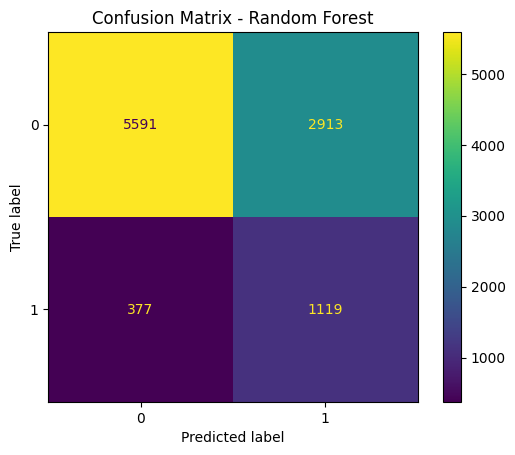

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Use Random Forest as best model
cm = confusion_matrix(y_test, rf_preds)

disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()


# Feature Importance

In [30]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

feature_importance


,Feature,Importance
8,booking_origin,0.418740
7,route,0.122829
12,flight_duration,0.118290
4,length_of_stay,0.114209
3,purchase_lead,0.054679
9,wants_extra_baggage,0.033059
13,total_extras,0.032546
5,flight_hour,0.029608
1,sales_channel,0.019467
6,flight_day,0.016326


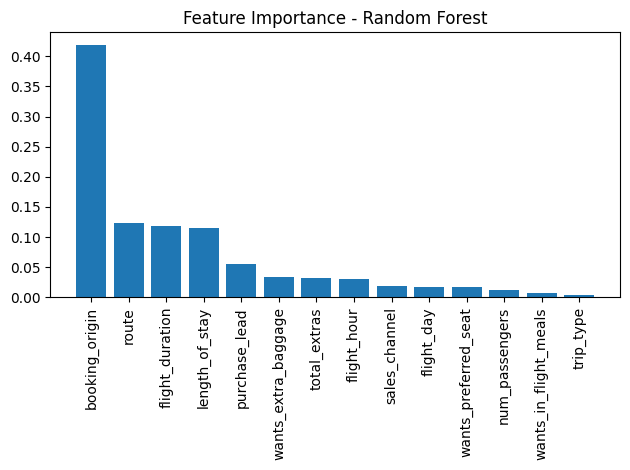

In [31]:
plt.figure()
plt.bar(feature_importance["Feature"], feature_importance["Importance"])
plt.xticks(rotation=90)
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.savefig("../outputs/feature_importance.png")
plt.show()


## Key Insights

-Three models were tested: Logistic Regression, Decision Tree, and Random Forest. Due to the highly imbalanced dataset (~15% completed bookings), F1-    score was used as the main metric. Random Forest performed best and was selected as the final model.

-Customer behavior features were the strongest predictors. Customers who selected additional services (baggage, meals, preferred seats) were more        likely to complete bookings. Key influential features included purchase lead time, flight duration, total extras, route, and booking origin.

-The model can help identify high-intent customers early, allowing the airline to target those selecting extras, traveling on high-value routes, or in   the mid-decision phase, improving conversion rates and marketing efficiency.